# TITANIC DATA ANALYTICS_Python

Hello,<br>
We are beginner in Kaggle. <br> 
So We refer to yassine ghouzam's Kernel(https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling) <br>
Welcome any opinion about our Kernel.<br>

Thank you!<br>

<ul>
	<li>0. Preparation</li>
	<li>1. Data Exploration</li>
		<ul>
			<li>1.1 Age</li>
			<li>1.2 Sex</li>
			<li>1.3 Embarked</li>
			<li>1.4 Pclass</li>
			<li>1.5 Parch</li>
			<li>1.6 SibSp</li>
			<li>1.7 Fare</li>
			<li>1.8 Relations among Variables</li>
		</ul>
	<li>2. Feature Engineering</li>
		<ul>
			<li>2.1 Name</li>
			<li>2.2 Parch+SibSp->FamilySize</li>
		</ul>
    <li>3. Filling Missing Values</li>
        <ul>
            <li>3.1 Fare</li>
            <li>3.2 Embarked</li>
            <li>3.3 Age</li>
        </ul>
    <li>4. Data Categorization & Dummy</li>
        <ul>
            <li>4.1 Sex</li>
            <li>4.2 Embarked</li>
            <li>4.3 Pclass</li>
            <li>4.4 Title</li>
            <li>4.5 FamilySize</li>
        </ul>
	<li>5. Modeling</li>
		<ul>
			<li>5.1 Cross-Validation</li>
			<li>5.2 Tunning Parameters</li>
			<li>5.3 Learning Curve</li>
			<li>5.4 Model Feature Importance</li>
			<li>5.5 Ensemble Modeling</li>
		</ul>
	<li>6. Prediction</li>
<ul>

# 0. Preparation

## Import Packages

In [0]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


#Modeling
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier,  VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import  cross_val_score, KFold, learning_curve
from sklearn.model_selection import GridSearchCV

%matplotlib inline

## Loading Dataset

In [0]:
#get titanic data
train = pd.read_csv("../input/train.csv") #(891,12)
test = pd.read_csv("../input/test.csv") #(418, 11)

#combine train & test
total = train.append(test, ignore_index = True)

# 1. Data Exploration

## Info

In [0]:
total.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [0]:
total.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [0]:
total.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


In [0]:
#unique value
print('col_name'.center(15),'count','value'.center(20))
for col in total.columns:
    length=len(total[col].dropna().unique())
    if length <=10:
        print('##',col.center(11),':' ,length,' ,',total[col].dropna().unique())
    else:
        print('##',col.center(11),':' ,length)

    col_name    count        value        
##     Age     : 98
##    Cabin    : 186
##   Embarked  : 3  , ['S' 'C' 'Q']
##     Fare    : 281
##     Name    : 1307
##    Parch    : 8  , [0 1 2 5 3 4 6 9]
## PassengerId : 1309
##    Pclass   : 3  , [3 1 2]
##     Sex     : 2  , ['male' 'female']
##    SibSp    : 7  , [1 0 3 4 2 5 8]
##   Survived  : 2  , [0. 1.]
##    Ticket   : 929


##Number of Null

As you can see, there are missing values.<br>
The order based on values having more missing values except Survived(because Survived feature is in test data): <br> (Many) Cabin > Age > Embarked > Fare <br>


In [0]:
total.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

#1.0 Survived probability

([<matplotlib.patches.Wedge at 0x7f41d8101978>,
 [Text(-0.39257493509945834, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.2141317827815227, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

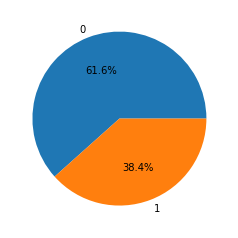

In [0]:
a=train.Survived.value_counts()
plt.pie(a,labels=a.index,autopct='%1.1f%%')

# 1.1 Age 

Age distribution looks like normal distribution

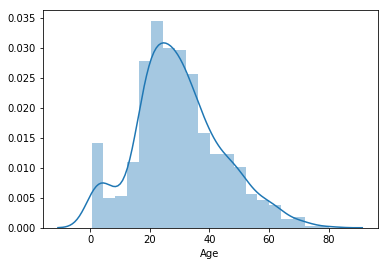

In [0]:
sns.distplot(train.Age.dropna())

We wonder If there is different depending on age interval like 2,3,4..<br>
We set interval from 2 to 10, and show y_axis: survival percentage ,x_axis: age.<br>
Find out some age bands are different such as under 6 age and over 70 age.

###interval=2###
###interval=3###
###interval=4###
###interval=5###
###interval=6###
###interval=7###
###interval=8###
###interval=9###
###interval=10###


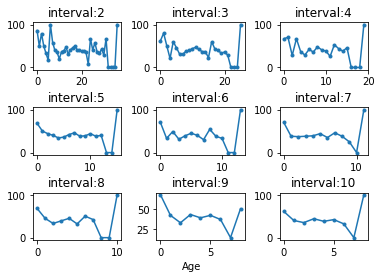

In [0]:
#Survival(%) by Age Interval
fig,ax=plt.subplots(3,3)
fig.subplots_adjust(hspace=0.8,wspace=0.4)
for interval in range(2,11):
    age_dict0={(i,i+interval):0 for i in range(0,int(train.Age.max()+interval),interval)}
    age_dict1={(i,i+interval):0 for i in range(0,int(train.Age.max()+interval),interval)}
    
    def survive_age1(age):
        global age_dict0; value=age//interval
        age_dict0[(interval*value,interval*(value+1))]+=1
                                        
    def survive_age2(age):
        global age_dict1; value=age//interval
        age_dict1[(interval*value,interval*(value+1))]+=1
                      
    train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())].apply(survive_age1)
    train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())].apply(survive_age2)
    age_list=[round(age_dict1[i]*100/(age_dict1[i]+age_dict0[i])) for i in age_dict1.keys() if age_dict0[i]+age_dict1[i]!=0]
    print('###interval=%d###'%(interval))
    a,b=divmod(interval-2,3)
    ax[a][b].plot(age_list,marker='.')
    ax[a][b].set_title("interval:{}".format(interval))
plt.xlabel("Age",x=-1,y=0)
plt.show()
    

# 1.2 Sex

Male is more than Female,but Survived probability is opposite.

In [0]:
a=train['Sex'].value_counts()
print(a)

male      577
female    314
Name: Sex, dtype: int64


([<matplotlib.patches.Wedge at 0x7f41d7e38940>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')],
 [Text(-0.2683338620074884, 0.5366534622082915, '64.8%'),
  Text(0.26833391225261044, -0.53665343708506, '35.2%')])

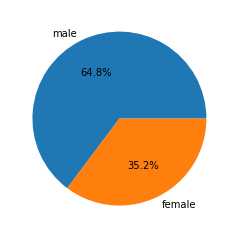

In [0]:
plt.pie(a,labels=a.index,autopct='%1.1f%%')

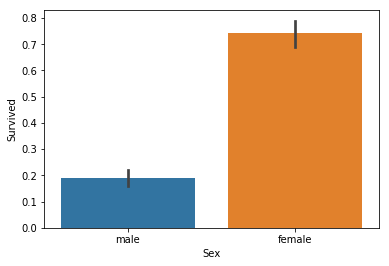

In [0]:
sns.barplot(x="Sex", y="Survived", data=train)

# 1.3 Embarked

'S'  is most popular Embarking place ,but Survived probability is lowest.

In [0]:
a=train['Embarked'].value_counts()
print(a)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


([<matplotlib.patches.Wedge at 0x7f41d7d889e8>,
 [Text(-0.7128398214280038, 0.8377704870586524, 'S'),
  Text(0.4614522559226597, -0.9985298270476893, 'C'),
  Text(1.0595276168013974, -0.29563698894954155, 'Q')],
 [Text(-0.38882172077891114, 0.4569657202138104, '72.4%'),
  Text(0.25170123050326887, -0.5446526329351032, '18.9%'),
  Text(0.577924154618944, -0.16125653942702264, '8.7%')])

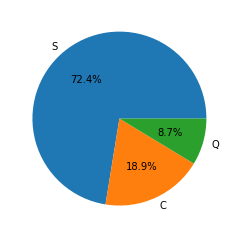

In [0]:
plt.pie(a,labels=a.index,autopct='%1.1f%%')

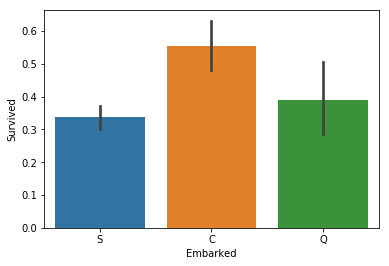

In [0]:
sns.barplot(x='Embarked', y='Survived', data=train)

In [0]:
train[["Embarked","Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


# 1.4 Pclass

In [0]:
a=train['Pclass'].value_counts()
print(a)


3    491
1    216
2    184
Name: Pclass, dtype: int64


([<matplotlib.patches.Wedge at 0x7f41d7d26a58>,
 [Text(-0.17571616709359641, 1.0858746836637898, '3'),
  Text(-0.5160762002061153, -0.9714243951954356, '1'),
  Text(0.8765111456658484, -0.6646263698677192, '2')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.1%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.2%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.7%')])

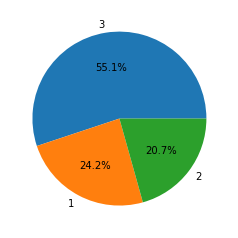

In [0]:
plt.pie(a,labels=a.index,autopct='%1.1f%%')

Pclass '1' have higher survival than others.

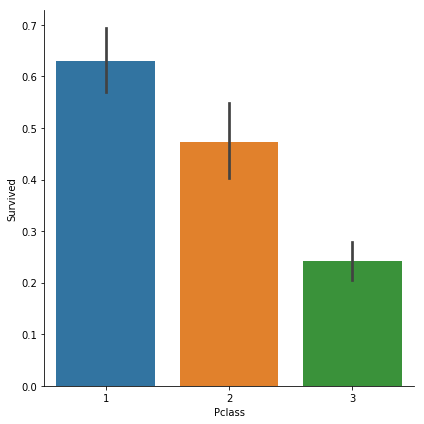

In [0]:
sns.catplot(x='Pclass',y='Survived',data=train,kind='bar',size=6)

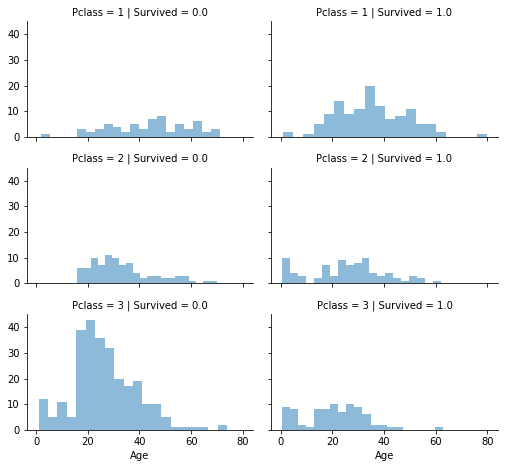

In [0]:
grid = sns.FacetGrid(total, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# 1.5 Parch

In [0]:
a=train['Parch'].value_counts()
print(a)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


([<matplotlib.patches.Wedge at 0x7f41d79650b8>,
 [Text(-0.804092179728483, 0.750623585094085, '0'),
  Text(0.5126478637981279, -0.973237981042261, '1'),
  Text(1.018296364993601, -0.41601984693139255, '2'),
  Text(1.0957292322146563, -0.09683723287186521, '5'),
  Text(1.098461885865451, -0.05815053998818253, '3'),
  Text(1.0997538533271654, -0.023269338023504005, '4'),
  Text(1.0999931622972063, -0.0038785176797351347, '6')],
 [Text(-0.43859573439735433, 0.4094310464149554, '76.1%'),
  Text(0.2796261075262515, -0.5308570805685059, '13.2%'),
  Text(0.5554343809056005, -0.22691991650803228, '9.0%'),
  Text(0.5976704902989034, -0.0528203088391992, '0.6%'),
  Text(0.5991610286538823, -0.03171847635719047, '0.6%'),
  Text(0.5998657381784537, -0.012692366194638547, '0.4%'),
  Text(0.5999962703439307, -0.002115555098037346, '0.1%')])

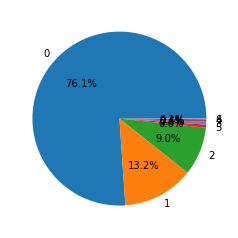

In [0]:
plt.pie(a,labels=a.index,autopct='%1.1f%%')

People who have 1,2,3 parents or children have high survival

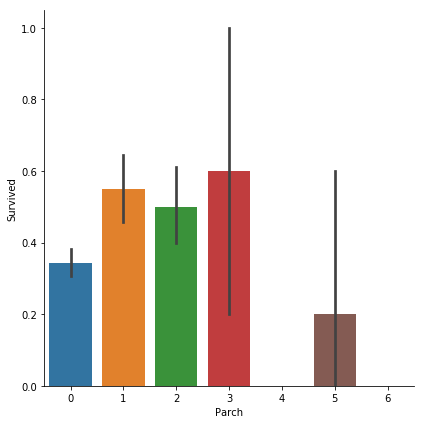

In [0]:
sns.catplot(x='Parch',y='Survived',data=train,kind='bar',size=6)

# 1.6 SibSp

In [0]:
a=train['SibSp'].value_counts()
print(a)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


([<matplotlib.patches.Wedge at 0x7f41d78a5f28>,
 [Text(-0.596335425299201, 0.9243289785207544, '0'),
  Text(0.33770481176055295, -1.0468789137783652, '1'),
  Text(1.0029980041727713, -0.45165806051197366, '2'),
  Text(1.0627689715338293, -0.28376418580385865, '4'),
  Text(1.089077888508049, -0.15462649437547848, '3'),
  Text(1.0980245143543599, -0.06589511269337359, '8'),
  Text(1.0998290643754833, -0.019391471190945954, '5')],
 [Text(-0.3252738683450187, 0.5041794428295023, '68.2%'),
  Text(0.18420262459666523, -0.5710248620609264, '23.5%'),
  Text(0.5470898204578751, -0.24635894209744014, '3.1%'),
  Text(0.5796921662911796, -0.15478046498392287, '2.0%'),
  Text(0.5940424846407539, -0.08434172420480643, '1.8%'),
  Text(0.5989224623751053, -0.035942788741840134, '0.8%'),
  Text(0.5999067623866272, -0.010577166104152338, '0.6%')])

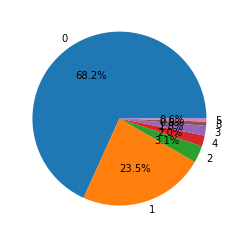

In [0]:
plt.pie(a,labels=a.index,autopct='%1.1f%%')

People who have 1,2 Siblings or spouse have high survival

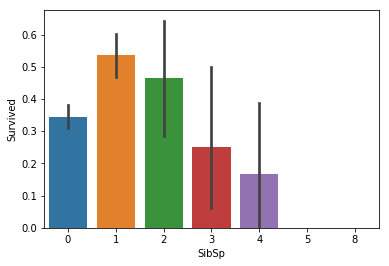

In [0]:
sns.barplot(x='SibSp',y='Survived',data=train)

# 1.7 Fare

Fare distribution has high kurtosis

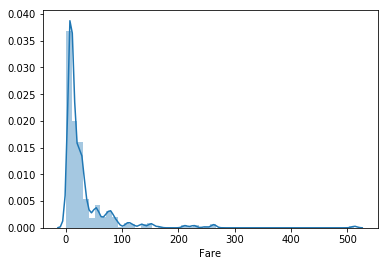

In [0]:
sns.distplot(train.Fare.dropna()) 

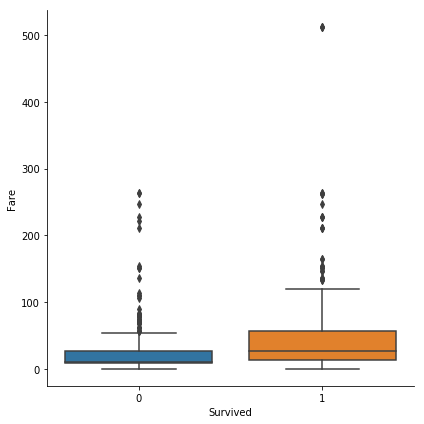

In [0]:
sns.catplot(x='Survived',y='Fare',data=train,kind='box',size=6)

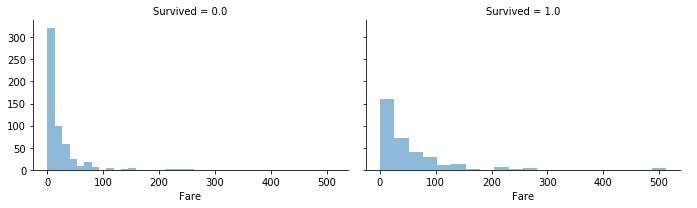

In [0]:
#Fare Distribution according to Survived
grid = sns.FacetGrid(total, col='Survived', height=3, aspect=1.6)
grid.map(plt.hist, 'Fare', alpha=.5, bins=20)
grid.add_legend();

# 1.7 Relations among Variables

There are some correlation between Pclass and Fare, SibSp and Parch .

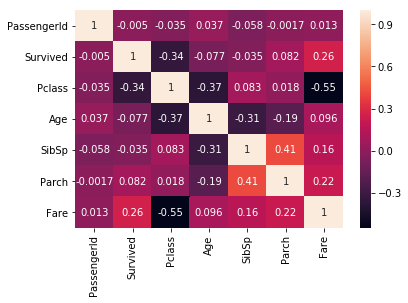

In [0]:
sns.heatmap(train.corr(),annot=True)

## Embark + Age

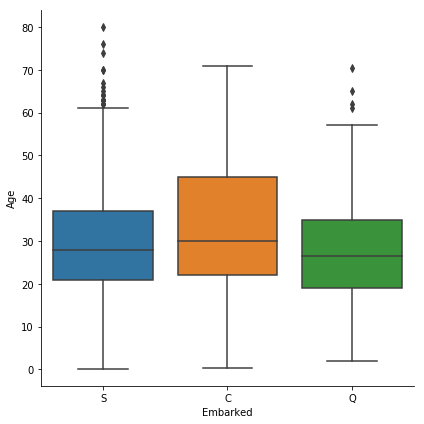

In [0]:
sns.catplot(x='Embarked',y='Age',size=6,kind='box',data=total)
#Conclusion : no special differenciation

## Sex + Fare

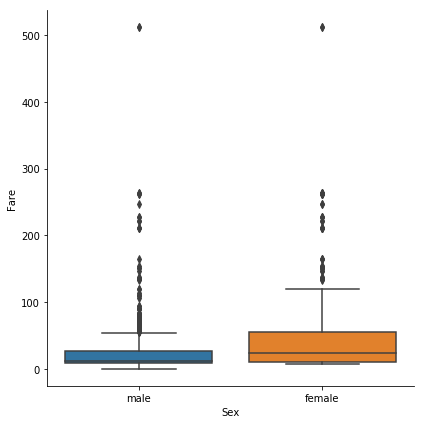

In [0]:
sns.factorplot(x='Sex',y='Fare',size=6,kind='box',data=total)

# 2. Feature Engineering

# 2.1 Name

The reason that we extract the title is for filling missing Age and it will be used for value when we process modeling.<br>
Name is consist of Title,first name,second name. We classify title of name into 5 titles like Mr, Mrs, Miss, Master, Rare.<br>
Since the others are < 10 each of them so that we decide it would be better to combine all to Rare category.<br>

In [0]:
#Age Distirbution according to Title
total['Title'] = total.Name.str.extract('([A-Za-z]+)\.', expand=True)
print(list(total.Title.unique()))
print(total.Title.value_counts())



['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer', 'Dona']
Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Jonkheer      1
Capt          1
Dona          1
Countess      1
Mme           1
Sir           1
Lady          1
Don           1
Name: Title, dtype: int64


In [0]:
total['Title'] = total['Title'].replace('Mlle', 'Miss')
total['Title'] = total['Title'].replace(['Capt', 'Col','Countess',
    'Don','Dona', 'Dr', 'Major','Mme','Ms','Lady','Sir', 'Rev', 'Jonkheer' ],'Rare')
print(total.Title.value_counts())

Mr        757
Miss      262
Mrs       197
Master     61
Rare       32
Name: Title, dtype: int64


# 2.2 Parch+SibSp->FamilySize

We suppose Family size is important for  survival.As a result, 1 ~4 size of family survived more than others.

In [0]:
total['FamilySize'] = total['SibSp'] + total['Parch'] + 1

Text(0.5, 1.0, 'FamilySize vs Survived')

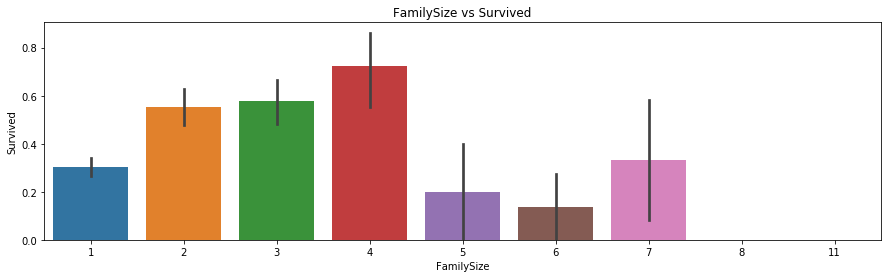

In [0]:
f,ax=plt.subplots(1,1,figsize=(15,4))
sns.barplot('FamilySize','Survived',data=total,ax=ax)
ax.set_title('FamilySize vs Survived')


In [0]:
total.loc[total['FamilySize'] == 1, 'FamilySize'] = 0
total.loc[(total['FamilySize'] > 1) & (total['FamilySize'] <= 4), 'FamilySize'] = 1
total.loc[(total['FamilySize'] > 4), 'FamilySize']   = 2

In [0]:
total[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived',ascending=False)

,Survived
FamilySize,
1,0.578767
0,0.303538
2,0.161290


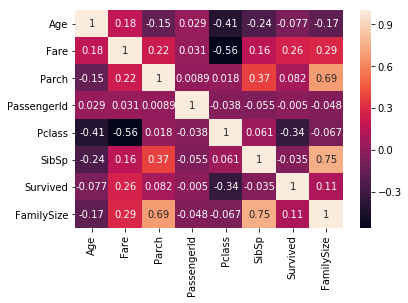

In [0]:
sns.heatmap(total.corr(),annot=True)

In [0]:
#Parchm SibSp del
total = total.drop(['Parch','SibSp'], axis=1)

# 3 Filling Missing Values

These are missing values given below<br>

Fare: 1 <br>
Embarked: 2 <br>
Age: 263 <br>
Cabin: 1114 <br>


# 3.1 Fare

Fill median without outliers, Because Fare distribution has high kurtosis

In [0]:
total[total.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket,Title,FamilySize
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",1044,3,male,NaN,3701,Mr,0


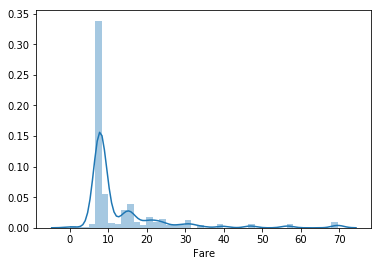

In [0]:
sns.distplot(total.Fare[(total.Pclass==3) & (total.Fare.notnull())])

In [0]:
total['Fare'] = total.Fare.fillna(total[total['Pclass']==3]['Fare'].median())

In [0]:
total.Fare.isnull().sum()

0

# 3.2 Embarked

Two women has 80 of Fare. So we look Embarked and Fare distribution.<br>
Among 3 ports , C port has fare range including 80. SO we decide those women's port is 'C'

In [0]:
total[total.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket,Title,FamilySize
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",62,1,female,1.0,113572,Miss,0
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",830,1,female,1.0,113572,Mrs,0


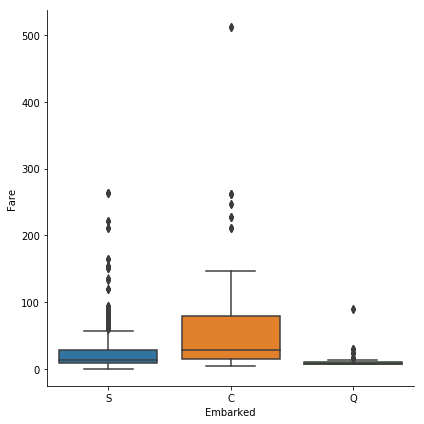

In [0]:
sns.catplot(x='Embarked',y='Fare',size=6,kind='box',data=total)

In [0]:
total['Embarked'] = total.Embarked.fillna('C')

In [0]:
total.Embarked.isnull().sum()

0

# 3.3 Age

There is difference of age distribution depending on title.<br>
So we fill age missing value according to mean age of title.

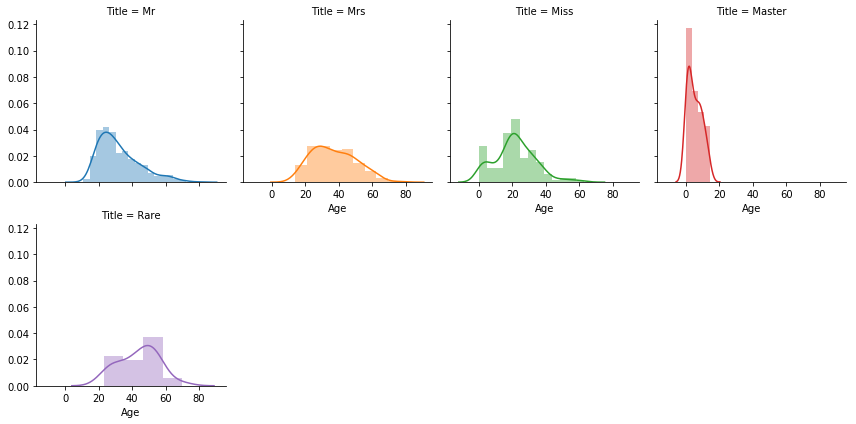

In [0]:
TotalAge = total[total.Age.isnull()==False]
grid = sns.FacetGrid(TotalAge, col="Title", hue="Title",col_wrap=4)
grid.map(sns.distplot, "Age")

In [0]:
total[['Title', 'Age']].groupby(['Title']).median().sort_values(by='Title',ascending=False)

,Age
Title,
Rare,46.0
Mrs,35.5
Mr,29.0
Miss,22.0
Master,4.0


In [0]:
total['Age']=total.groupby('Title').transform(lambda x:x.fillna(x.median()))

# 4 Data Categorization & Dummy

We dicide to use Age, Embarked, Fare, Plcass, Sex and FamilySize for feature engineering.<br>
The reason of dropping the others:<br>
<pre>
Cabin: Most of Cabins are missing
Name: We already extracted title
Ticket: We weren't able to find out encrypted meaning inside.
</pre>

In [0]:
total = total.drop(['Cabin','Name','Ticket'], axis=1)

In [0]:
total.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,FamilySize
0,22.0,S,7.2500,1,3,male,0.0,Mr,1
1,38.0,C,71.2833,2,1,female,1.0,Mrs,1
2,26.0,S,7.9250,3,3,female,1.0,Miss,0
3,35.0,S,53.1000,4,1,female,1.0,Mrs,1
4,35.0,S,8.0500,5,3,male,0.0,Mr,0


# 4.1 Sex

We classify Female to 1 and Male to 0

In [0]:
total['Sex'] = total['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
total.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,FamilySize
0,22.0,S,7.2500,1,3,0,0.0,Mr,1
1,38.0,C,71.2833,2,1,1,1.0,Mrs,1
2,26.0,S,7.9250,3,3,1,1.0,Miss,0
3,35.0,S,53.1000,4,1,1,1.0,Mrs,1
4,35.0,S,8.0500,5,3,0,0.0,Mr,0


# 4.2 Embarked

We use get_dummies in Pandas for processing Embarked

In [0]:
total["Embarked"] = total["Embarked"].astype("category")
total = pd.get_dummies(total, columns = ["Embarked"],prefix="Embarked")
total.head()

,Age,Fare,PassengerId,Pclass,Sex,Survived,Title,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,1,3,0,0.0,Mr,1,0,0,1
1,38.0,71.2833,2,1,1,1.0,Mrs,1,1,0,0
2,26.0,7.9250,3,3,1,1.0,Miss,0,0,0,1
3,35.0,53.1000,4,1,1,1.0,Mrs,1,0,0,1
4,35.0,8.0500,5,3,0,0.0,Mr,0,0,0,1


# 4.3 Pclass

In [0]:
total["Pclass"] = total["Pclass"].astype("category")
total = pd.get_dummies(total, columns = ["Pclass"],prefix="Pclass")
total.head()

,Age,Fare,PassengerId,Sex,Survived,Title,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,7.2500,1,0,0.0,Mr,1,0,0,1,0,0,1
1,38.0,71.2833,2,1,1.0,Mrs,1,1,0,0,1,0,0
2,26.0,7.9250,3,1,1.0,Miss,0,0,0,1,0,0,1
3,35.0,53.1000,4,1,1.0,Mrs,1,0,0,1,1,0,0
4,35.0,8.0500,5,0,0.0,Mr,0,0,0,1,0,0,1


# 4.4 Title

In [0]:
total["Title"] = total["Title"].astype("category")
total = pd.get_dummies(total, columns = ["Title"],prefix="Title")

# 4.5 FamilySize

We already categorized FamilySize, We renamed them as Family_Single,Small and Large

In [0]:
total[ 'Family_Single' ] = total[ 'FamilySize' ].map( lambda s : 1 if s == 0 else 0 )
total[ 'Family_Small' ]  = total[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
total[ 'Family_Large' ]  = total[ 'FamilySize' ].map( lambda s : 1 if s == 2 else 0 )

total = total.drop(['FamilySize'], axis=1)
total.head()

,Age,Fare,PassengerId,Sex,Survived,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Family_Single,Family_Small,Family_Large
0,22.0,7.2500,1,0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,38.0,71.2833,2,1,1.0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
2,26.0,7.9250,3,1,1.0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
3,35.0,53.1000,4,1,1.0,0,0,1,1,0,0,0,0,0,1,0,0,1,0
4,35.0,8.0500,5,0,0.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0


# 5 Modeling


Almost done!  We've just finised feature engineering, now we need to adjust several models.<br>
<pre>
train: train set
y_train: only Survived values of train set
x_train: all values except for Survived
test: test set
</pre>

We split the train set into train and test again for testing

In [0]:
del train,test
train=total[:891];test=total[891:];test_id=test['PassengerId'];test=test.drop(['Survived','PassengerId'],1)
y_train=train['Survived'];x_train=train.drop(['Survived','PassengerId'],1)

x_train1, x_test, y_train1, y_test = train_test_split(x_train, y_train, random_state=0)
del total,train

# 5.1 Cross-Validation

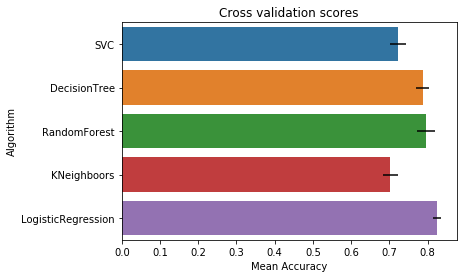

In [0]:
random_state = 0
kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)

classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))


cv_means = [];cv_stds= []
for classifier in classifiers :
    result=cross_val_score(classifier, x_train, y_train, scoring = "accuracy", cv = kfold)
    cv_means.append(result.mean());cv_stds.append(result.std())
    
cv_df= pd.DataFrame({"Means":cv_means,"Stds": cv_stds,"Algorithm":["SVC","DecisionTree","RandomForest","KNeighboors","LogisticRegression"]})

g = sns.barplot("Means","Algorithm",data = cv_df,orient = "h",**{'xerr':cv_stds})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

# 5.2 Tunning Parameters

In [0]:
#Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5,n_jobs=-1,return_train_score=True)

grid_search.fit(x_train1, y_train1)
print("Test score: {}".format(grid_search.score(x_test,y_test)))
print("Best Parameter : {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

print("Best score model: \n{}".format(grid_search.best_estimator_))

Test score: 0.8116591928251121
Best Parameter : {'C': 0.1}
Best cross-validation score: 0.83
Best score model: 
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


# 6. Prediction

In [0]:
logi=LogisticRegression(C=0.1)
logi.fit(x_train,y_train)
y_pred=logi.predict(test).astype(int)
test_score = round(logi.score(x_train, y_train) * 100, 2)
print(test_score)

submission = pd.DataFrame({
        "PassengerId": test_id,
        "Survived": y_pred
    })

submission.to_csv('submission.csv', index=False)

82.72
